In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('df_viewing_normal.csv')

Saving df_viewing_normal.csv to df_viewing_normal (2).csv


In [6]:
print(df.shape)

(216603, 8)


In [7]:
print(df.head(10))

  session_id user_id content_id  watch_date  watch_duration_minutes  \
0    S000002   U0001       M110  2024-08-06                      30   
1    S000003   U0001       S005  2024-03-20                      18   
2    S000004   U0001       M105  2024-02-24                      77   
3    S000005   U0001       M148  2024-08-18                      47   
4    S000006   U0001       M015  2024-01-08                      59   
5    S000007   U0001       M038  2024-05-26                     101   
6    S000008   U0001       M043  2024-05-17                     118   
7    S000009   U0001       S024  2024-08-25                      14   
8    S000010   U0001       M021  2024-07-20                     109   
9    S000011   U0001       S031  2024-04-11                      51   

   completion_percentage device_type quality_level  
0                   23.6    Smart TV            SD  
1                   65.3     Desktop            4K  
2                   74.4      Mobile            HD  
3     

In [8]:
#Valores unicos de la columna "user_id" y su conteo total de cada uno
df["user_id"].value_counts()


,count
user_id,
U1685,104
U1646,104
U1570,104
U4618,104
U0920,104
...,...
U3635,6
U2302,6
U2590,6


In [9]:
#Valores unicos de la columna "content_id" y su conteo total de cada uno
df["content_id"].value_counts()


,count
content_id,
S040,1321
M068,1320
S057,1307
M031,1306
M176,1304
...,...
M013,487
M037,487
M195,486


In [10]:
#Valores unicos de la columna "device_type" y su conteo total de cada uno
df["device_type"].value_counts()


,count
device_type,
Smart TV,77696
Mobile,67849
Desktop,30483
Tablet,30343
Gaming Console,10232


In [11]:
#Valores unicos de la columna "quality_level" y su conteo total de cada uno
df["quality_level"].value_counts()


,count
quality_level,
HD,106103
4K,60847
SD,49653


In [12]:
# Obtener información sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216603 entries, 0 to 216602
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              216603 non-null  object 
 1   user_id                 216603 non-null  object 
 2   content_id              216603 non-null  object 
 3   watch_date              216603 non-null  object 
 4   watch_duration_minutes  216603 non-null  int64  
 5   completion_percentage   216603 non-null  float64
 6   device_type             216603 non-null  object 
 7   quality_level           216603 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.2+ MB
None


### 2\. Manejo de valores faltantes

In [13]:
# Contar el número de valores faltantes por columna
print(df.isnull().sum())

session_id                0
user_id                   0
content_id                0
watch_date                0
watch_duration_minutes    0
completion_percentage     0
device_type               0
quality_level             0
dtype: int64


### 3\. Eliminación de filas duplicadas

In [14]:
# Contar el número de filas duplicadas
print(df.duplicated().sum())


0


### Central tendency

In [15]:
# Media
df[["watch_duration_minutes", "completion_percentage"]].mean()


,0
watch_duration_minutes,80.695992
completion_percentage,80.160902


In [16]:
# Mediana
df[["watch_duration_minutes", "completion_percentage"]].median()


,0
watch_duration_minutes,81.0
completion_percentage,85.2


In [17]:
# Moda
df[["watch_duration_minutes", "completion_percentage"]].mode()


,watch_duration_minutes,completion_percentage
0,23,100.0


### Dispersion measures calculation

In [18]:
# Rango (max - min)
df[["watch_duration_minutes", "completion_percentage"]].max() - df[["watch_duration_minutes", "completion_percentage"]].min()


,0
watch_duration_minutes,176.0
completion_percentage,78.2


In [19]:
# Varianza
df[["watch_duration_minutes", "completion_percentage"]].var()


,0
watch_duration_minutes,1966.071977
completion_percentage,359.826305


In [20]:
# Desviación estándar
df[["watch_duration_minutes", "completion_percentage"]].std()


,0
watch_duration_minutes,44.340410
completion_percentage,18.969088


In [21]:
# Coeficiente de variación
df[["watch_duration_minutes", "completion_percentage"]].std() / df[["watch_duration_minutes", "completion_percentage"]].mean()


,0
watch_duration_minutes,0.549475
completion_percentage,0.236638


In [22]:
# Percentiles
df[["watch_duration_minutes", "completion_percentage"]].quantile([0.25, 0.5, 0.75])

,watch_duration_minutes,completion_percentage
0.25,40.0,68.2
0.50,81.0,85.2
0.75,116.0,96.3


In [23]:
# IQR (Q3 - Q1)
Q1 = df[["watch_duration_minutes", "completion_percentage"]].quantile(0.25)
Q3 = df[["watch_duration_minutes", "completion_percentage"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


watch_duration_minutes    76.0
completion_percentage     28.1
dtype: float64


### Distribution analysis of key variables

##### watch_duration_minutes column

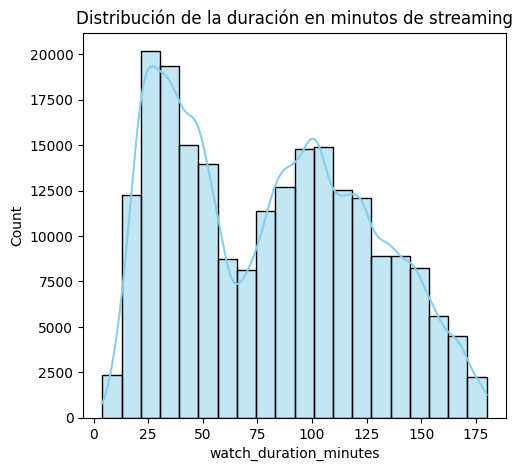

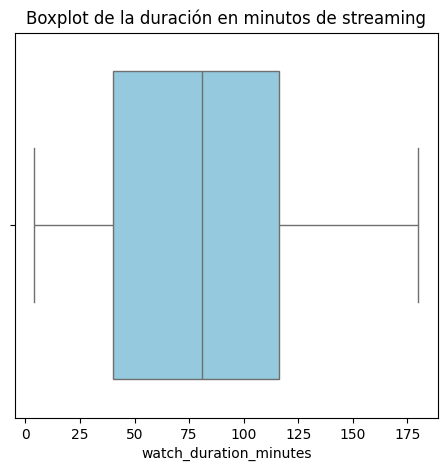

In [24]:
# Histogramas para ver distribución
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['watch_duration_minutes'], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la duración en minutos de streaming")

plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['watch_duration_minutes'], color="skyblue")
plt.title("Boxplot de la duración en minutos de streaming")

plt.show()

##### completion_percentage column

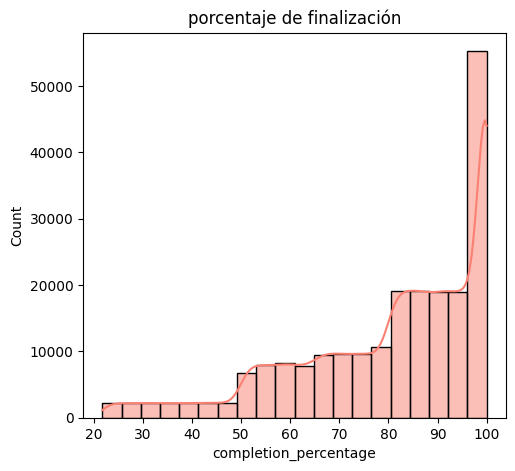

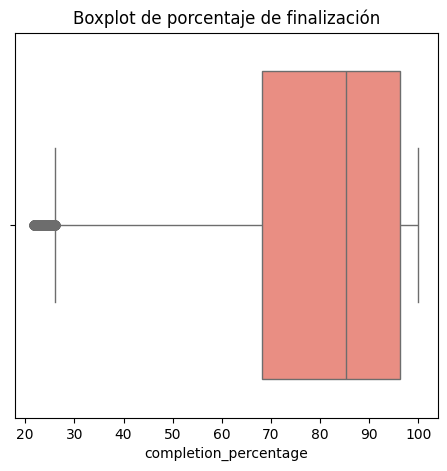

In [25]:
# Histogramas para ver distribución
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df['completion_percentage'], bins=20, kde=True, color="salmon")
plt.title("porcentaje de finalización")

plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df['completion_percentage'], color="salmon")
plt.title("Boxplot de porcentaje de finalización")

plt.show()

#### Outliers

Para este dataframe se eligió separar las outliers del datframe "users.csv" y crear otro con todas esas outliers y otro sin outliers. Esto con el fin de no eliminarlas ya que pueden aportar un insight bueno de como se comporta esa parte de la muestra

### Calcular Outliers con la columna "completion_percentage"

In [26]:

# Calcular Q1 (25%) y Q3 (75%)
Q1 = df["completion_percentage"].quantile(0.25)
Q3 = df["completion_percentage"].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

# Filtrar los outliers
outliers = df[(df["completion_percentage"] < lower_bound) |
              (df["completion_percentage"] > upper_bound)]

print("Cantidad de outliers:", outliers.shape[0])
print(outliers[["session_id","content_id", "watch_duration_minutes", "completion_percentage"]].head(12))


Límite inferior: 26.05000000000001
Límite superior: 138.45
Cantidad de outliers: 2429
    session_id content_id  watch_duration_minutes  completion_percentage
0      S000002       M110                      30                   23.6
14     S000016       M173                      40                   24.6
19     S000021       M074                      35                   24.2
77     S000080       S022                       8                   22.3
124    S000129       S017                       9                   25.6
209    S000217       M023                      35                   24.2
218    S000226       S067                      13                   22.2
234    S000244       M154                      20                   25.9
243    S000253       M035                      25                   22.6
445    S000461       S032                       9                   24.5
530    S000547       M114                      34                   22.1
703    S000723       S019             

### Separacion de dataframe sin outliers y solo outliers

In [27]:
# DataFrame con outliers
df_outliers_viewing = df[(df["completion_percentage"] < lower_bound) |
                 (df["completion_percentage"] > upper_bound)].copy()

# DataFrame sin outliers (datos normales)
df_normal_viewing = df[(df["completion_percentage"] >= lower_bound) &
               (df["completion_percentage"] <= upper_bound)].copy()

print("Filas totales del dataframe:", df.shape[0])
print("Filas totales del Dataframe sin outliers:", df_normal_viewing.shape[0])
print("Filas totales del Dataframe con outliers:", df_outliers_viewing.shape[0])


Filas totales del dataframe: 216603
Filas totales del Dataframe sin outliers: 214174
Filas totales del Dataframe con outliers: 2429


In [28]:
# Guardar en carpeta actual de trabajo
df_normal_viewing.to_csv("df_viewing_normal.csv", index=False)
df_outliers_viewing.to_csv("df_viewing_outlier.csv", index=False)

print("\n Archivos guardados como 'df_viewing_normal.csv' y 'df_viewing_outlier.csv'")


 Archivos guardados como 'df_viewing_normal.csv' y 'df_viewing_outlier.csv'


### Calculo de media central y desviacion con el nuevo dataset sin outliers

In [29]:
df_normal_viewing = pd.read_csv('df_viewing_normal.csv')

#### Calculo de tendencia central

In [30]:
# Media
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mean()


,0
watch_duration_minutes,81.337529
completion_percentage,80.799097


In [31]:
# Mediana
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].median()


,0
watch_duration_minutes,82.0
completion_percentage,85.4


In [32]:
# Mode
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mode()


,watch_duration_minutes,completion_percentage
0,23,100.0


##### Dispersion measures calculation

In [33]:
# Rango (max - min)
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].max() - df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].min()

,0
watch_duration_minutes,175.0
completion_percentage,73.9


In [34]:
# Varianza
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].var()

,0
watch_duration_minutes,1950.113768
completion_percentage,327.569736


In [35]:
# Desviación estándar
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].std()

,0
watch_duration_minutes,44.160092
completion_percentage,18.098888


In [36]:
# Coeficiente de variación
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].std() / df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].mean()

,0
watch_duration_minutes,0.542924
completion_percentage,0.223999


In [37]:
# Percentiles
df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile([0.25, 0.5, 0.75])

,watch_duration_minutes,completion_percentage
0.25,41.0,68.9
0.50,82.0,85.4
0.75,116.0,96.4


In [38]:
# IQR (Q3 - Q1)
Q1 = df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile(0.25)
Q3 = df_normal_viewing[["watch_duration_minutes", "completion_percentage"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

watch_duration_minutes    75.0
completion_percentage     27.5
dtype: float64


### Nuevos graficos sin outliers

##### watch_duration_minutes column

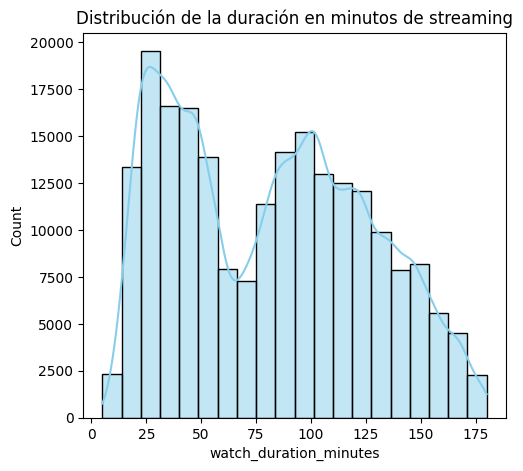

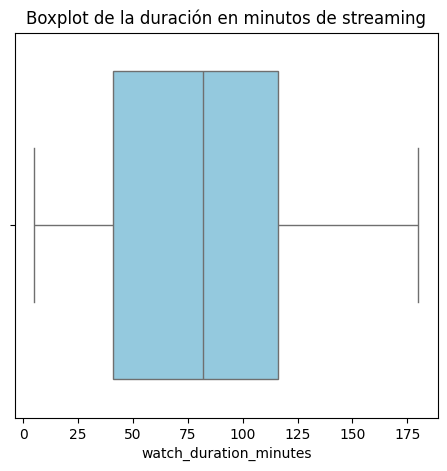

In [39]:
# Histogramas para ver distribución
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_normal_viewing['watch_duration_minutes'], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la duración en minutos de streaming")

plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_normal_viewing['watch_duration_minutes'], color="skyblue")
plt.title("Boxplot de la duración en minutos de streaming")

plt.show()

#### completion_percentage column

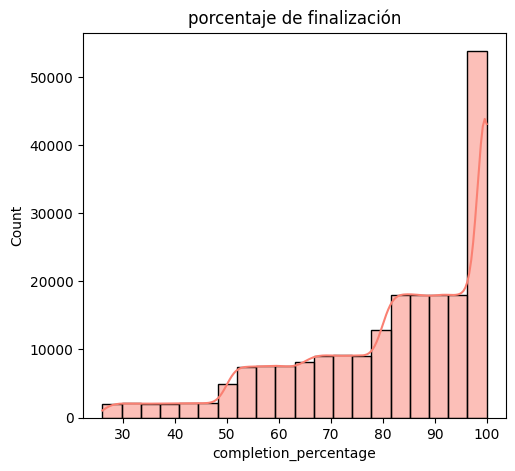

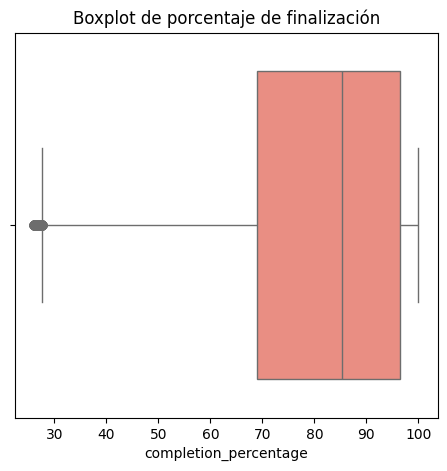

In [40]:
# Histogramas para ver distribución
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df_normal_viewing['completion_percentage'], bins=20, kde=True, color="salmon")
plt.title("porcentaje de finalización")

plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df_normal_viewing['completion_percentage'], color="salmon")
plt.title("Boxplot de porcentaje de finalización")

plt.show()

In [41]:
# Verificar si quedan valores fuera de límites
col = "completion_percentage"

aun_outliers = df_normal_viewing[(df_normal_viewing[col] < lower_bound) | (df_normal_viewing[col] > upper_bound)]
if aun_outliers.empty:
    print("\n✅ No hay outliers según el método IQR")
else:
    print("\n⚠️ Todavía hay outliers detectados:", aun_outliers.shape[0])



✅ No hay outliers según el método IQR


Ahora el dataframe "df_normal_viewning" no tiene outliers y ya se pueden trabajar esos datos para su respectivo analisis. Por otra parte, se guardó el dataframe "df_viewing_outlier" donde contiene unicamente las filas que se consideraron outliers pero no se eliminaron porque se puede elaborar un insight de como se comporta esa muestra

In [46]:
# ==== Imports para 2.2 Viewing Dataset ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown, display
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# Cargar df_viewing_normal si no está en memoria como dfv
try:
    dfv
except NameError:
    try:
        dfv = df_viewing_normal.copy()
    except NameError:
        dfv = pd.read_csv("df_viewing_normal.csv")

print("dfv shape:", dfv.shape)

dfv shape: (214174, 8)


In [42]:
# ===== 2.2 Inferential Analysis (Viewing Data) =====
from IPython.display import Markdown, display
display(Markdown("## 2.2 Inferential Analysis — Viewing Dataset (df_viewing_normal)"))

# Aseguramos que el DF está cargado
try:
    dfv = df_viewing_normal.copy()
except NameError:
    dfv = pd.read_csv("df_viewing_normal.csv")

print("Shape:", dfv.shape)
dfv.head(3)


## 2.2 Inferential Analysis — Viewing Dataset (df_viewing_normal)

Shape: (214174, 8)


,session_id,user_id,content_id,watch_date,watch_duration_minutes,completion_percentage,device_type,quality_level
0,S000003,U0001,S005,2024-03-20,18,65.3,Desktop,4K
1,S000004,U0001,M105,2024-02-24,77,74.4,Mobile,HD
2,S000005,U0001,M148,2024-08-18,47,30.1,Smart TV,4K


In [52]:
display(Markdown("### 2.2.1 Hypothesis Testing — Quality Level vs Viewing Duration"))

metric = 'watch_duration_minutes'
group_col = 'quality_level'

data = dfv[[group_col, metric]].dropna()
groups = [g[metric].values for _, g in data.groupby(group_col)]
labels = list(data[group_col].dropna().unique())

print(f"Grupos en {group_col}: {labels} (n={list(map(len, groups))})")

# Funciones auxiliares de efecto
def cohens_d(a, b):
    na, nb = len(a), len(b)
    s = np.sqrt(((na-1)*np.var(a, ddof=1) + (nb-1)*np.var(b, ddof=1)) / (na+nb-2))
    return (np.mean(a) - np.mean(b)) / s

def eta_squared_anova(F, k, N):
    # k = número de grupos, N = total de observaciones
    return (F * (k - 1)) / (F * (k - 1) + (N - k))

def epsilon_squared_kw(H, k, N):
    # Epsilon^2 para Kruskal-Wallis
    return (H - (k - 1)) / (N - 1)

# Normalidad por grupo (muestra hasta 5000)
normal_flags = []
for g in groups:
    g = np.asarray(g)
    if len(g) >= 8:
        p = stats.shapiro(g[:min(5000, len(g))])[1]
        normal_flags.append(p > 0.05)
    else:
        normal_flags.append(False)

# Homogeneidad de varianzas (si >=2 grupos)
if len(groups) >= 2:
    lev = stats.levene(*groups)
    equal_var = lev.pvalue > 0.05
else:
    equal_var = False

if len(groups) == 2:
    a, b = groups
    if all(normal_flags):
        t_stat, p_val = stats.ttest_ind(a, b, equal_var=equal_var)
        effect = cohens_d(a, b)
        print(f"Prueba: t-test (equal_var={equal_var}) | t={t_stat:.3f}, p={p_val:.6f} | Cohen d={effect:.3f}")
    else:
        u_stat, p_val = stats.mannwhitneyu(a, b, alternative='two-sided')
        # rank-biserial como efecto
        n1, n2 = len(a), len(b)
        d_rb = 1 - (2*u_stat)/(n1*n2)
        print(f"Prueba: Mann-Whitney U | U={u_stat:.0f}, p={p_val:.6f} | rank-biserial d={d_rb:.3f}")

elif len(groups) >= 3:
    if all(normal_flags) and equal_var:
        F, p_val = stats.f_oneway(*groups)
        eta2 = eta_squared_anova(F, k=len(groups), N=len(data))
        print(f"Prueba: ANOVA | F={F:.3f}, p={p_val:.6f} | eta²={eta2:.3f}")
    else:
        H, p_val = stats.kruskal(*groups)
        eps2 = epsilon_squared_kw(H, k=len(groups), N=len(data))
        print(f"Prueba: Kruskal–Wallis | H={H:.3f}, p={p_val:.6f} | ε²={eps2:.3f}")

# Medias por grupo para interpretar
means = data.groupby(group_col)[metric].mean().round(2)
display(Markdown("**Medias por grupo:**"))
display(means)

### 2.2.1 Hypothesis Testing — Quality Level vs Viewing Duration

Grupos en quality_level: ['4K', 'HD', 'SD'] (n=[60259, 104880, 49035])
Prueba: Kruskal–Wallis | H=54.689, p=0.000000 | ε²=0.000


**Medias por grupo:**

,watch_duration_minutes
quality_level,
4K,82.48
HD,80.90
SD,80.87


### 2.2.2 Correlation Analysis — Duration vs Completion

Spearman correlation = 0.380, p-value = 0.00000


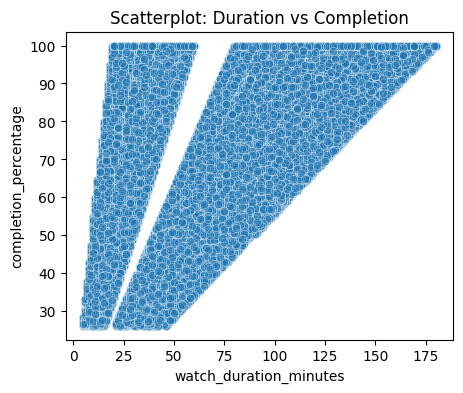

In [48]:
display(Markdown("### 2.2.2 Correlation Analysis — Duration vs Completion"))

num = dfv[['watch_duration_minutes','completion_percentage']].dropna()
corr, pval = stats.spearmanr(num['watch_duration_minutes'], num['completion_percentage'])

print(f"Spearman correlation = {corr:.3f}, p-value = {pval:.5f}")

plt.figure(figsize=(5,4))
sns.scatterplot(x='watch_duration_minutes', y='completion_percentage', data=num, alpha=0.5)
plt.title("Scatterplot: Duration vs Completion")
plt.show()

### 2.2.3 Clustering — Segmentation by Duration & Completion (Optimized)

Mejor k=3, silhouette=0.483


,watch_duration_minutes,completion_percentage
cluster,,
0,123.29,90.56
1,54.74,55.87
2,42.33,89.64


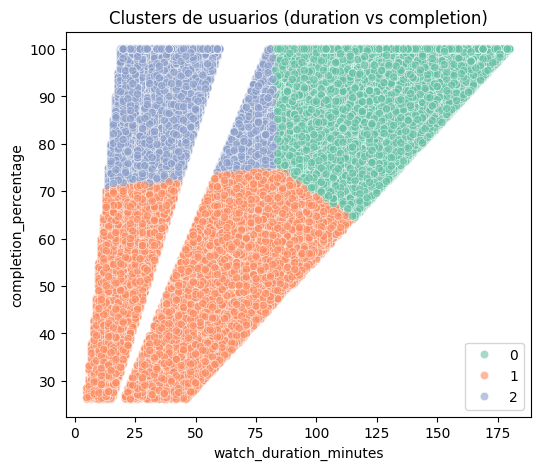

In [53]:
display(Markdown("### 2.2.3 Clustering — Segmentation by Duration & Completion (Optimized)"))

X = dfv[['watch_duration_minutes','completion_percentage']].dropna()
Xs = StandardScaler().fit_transform(X)

best_k, best_score = None, -1
for k in range(2,6):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(Xs)

    # Usamos solo una muestra para calcular silhouette (para que no se trabe)
    idx = np.random.choice(len(Xs), size=min(5000, len(Xs)), replace=False)
    score = silhouette_score(Xs[idx], labels[idx])

    if score > best_score:
        best_k, best_score = k, score

km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels = km.fit_predict(Xs)
X['cluster'] = labels
print(f"Mejor k={best_k}, silhouette={best_score:.3f}")

profile = X.groupby('cluster').mean().round(2)
display(profile)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X['watch_duration_minutes'], y=X['completion_percentage'],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("Clusters de usuarios (duration vs completion)")
plt.show()

In [50]:
display(Markdown("### 2.2.4 Regression — Predict retention (proxy)"))

dfv['retained_proxy'] = (dfv['completion_percentage'] >= 50).astype(int)

X = dfv[['watch_duration_minutes']].fillna(dfv['watch_duration_minutes'].median())
y = dfv['retained_proxy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_s, y_train)
y_pred = clf.predict(X_test_s)
y_proba = clf.predict_proba(X_test_s)[:,1]

print("=== Classification report ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

### 2.2.4 Regression — Predict retention (proxy)

=== Classification report ===
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      3330
           1      0.938     1.000     0.968     50214

    accuracy                          0.938     53544
   macro avg      0.469     0.500     0.484     53544
weighted avg      0.879     0.938     0.908     53544

ROC-AUC: 0.7944068725195503


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 2.2.5 Time Series — Viewing trends (robust)

⚠️ No se encontró columna de fecha en df_viewing_normal. Creando columna simulada `fake_date`...


/tmp/ipython-input-659360205.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  m = ts['watch_duration_minutes'].resample('M').sum()


**Serie mensual de minutos vistos (suma):**

,watch_duration_minutes
fake_date,
2024-08-31,493279
2024-09-30,467373
2024-10-31,491891
2024-11-30,486611
2024-12-31,501757


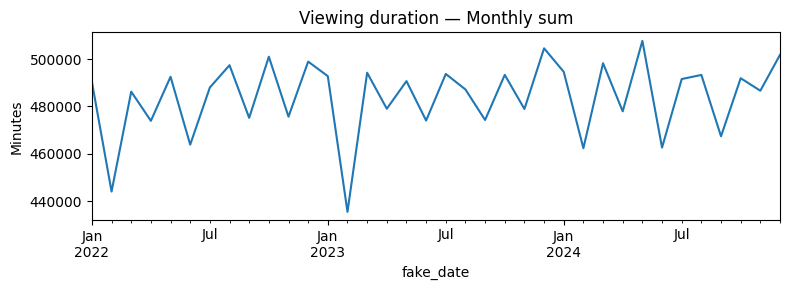

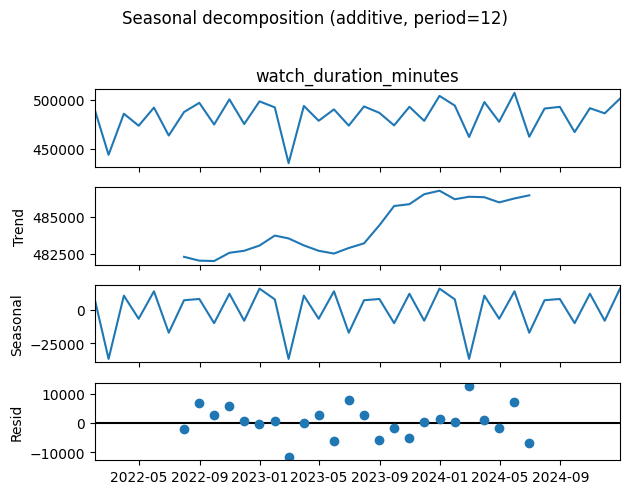

In [55]:
display(Markdown("### 2.2.5 Time Series — Viewing trends (robust)"))

# 1) Intentar detectar columna real de fecha
date_candidates = ['view_date','session_date','timestamp','date']
date_col = next((c for c in date_candidates if c in dfv.columns), None)

# 2) Si no existe, crear fecha simulada *sin desbordar* el rango
if date_col is None:
    print("⚠️ No se encontró columna de fecha en df_viewing_normal. Creando columna simulada `fake_date`...")
    import numpy as np
    rng = np.random.default_rng(42)  # semilla para reproducibilidad

    start = pd.Timestamp("2022-01-01")
    end   = pd.Timestamp("2024-12-31")
    days  = (end - start).days + 1

    # Asigna a cada fila un día aleatorio dentro de la ventana [start, end]
    dfv['fake_date'] = start + pd.to_timedelta(rng.integers(0, days, size=len(dfv)), unit='D')
    date_col = 'fake_date'

# 3) Preparar serie y graficar
if 'watch_duration_minutes' not in dfv.columns:
    raise ValueError("No se encontró la columna `watch_duration_minutes` en df_viewing_normal.")

ts = dfv[[date_col, 'watch_duration_minutes']].dropna().copy()
ts[date_col] = pd.to_datetime(ts[date_col], errors='coerce')
ts = ts.dropna(subset=[date_col]).set_index(date_col).sort_index()

# Agregación mensual (suma de minutos vistos)
m = ts['watch_duration_minutes'].resample('M').sum()
display(Markdown("**Serie mensual de minutos vistos (suma):**"))
display(m.tail())

plt.figure(figsize=(8,3))
m.plot()
plt.title("Viewing duration — Monthly sum")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

# 4) Descomposición estacional solo si hay >= 24 puntos mensuales
if len(m) >= 24:
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomp = seasonal_decompose(m, model='additive', period=12)
    decomp.plot()
    plt.suptitle("Seasonal decomposition (additive, period=12)", y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes puntos (>=24) para descomponer estacionalidad. Se muestra la tendencia global.")
